month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
Name: sales, dtype: float64


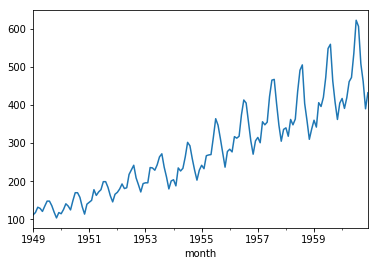

In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import time
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
# import requests
# from io import BytesIO

def parser(x):
    return datetime.strptime('19'+x, '%Y-%m')
 
series = pd.read_csv('air1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

print(series.head())
series.plot()
plt.show()

In [18]:
# SARIMA model test
# 12/03/2018

# type is time series
data= series
df = np.log(data)
df1=df.diff(periods=1)
df1_12=df1.diff(periods=12)
data= df1_12
my_order = (0, 1, 1)
my_seasonal_order = (0, 1, 1, 12)

start_time = time.time()
for i in range(0,10):
    sm.tsa.statespace.SARIMAX(df, order=my_order, seasonal_order=my_seasonal_order).fit().aic
    i=i+1


time.time() - start_time

C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packa

3.175325632095337

In [14]:
## use simulated values to enlarge the dataset
# series288 = pd.read_csv('new_288_data.csv', header=0, parse_dates=['DATE'], index_col=0, squeeze=True, usecols=['DATE','AIR'])
# series288.to_csv('out288.csv')

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

series288 = pd.read_csv('out288.csv', header=0, parse_dates=[0], index_col=0, squeeze=True,date_parser=parser)
data= series288
df = np.log(data)
df1=df.diff(periods=1)
df1_12=df1.diff(periods=12)
data= df1_12
my_order = (0, 1, 1)
my_seasonal_order = (0, 1, 1, 12)

start_time = time.time()
for i in range(0,10):
    sm.tsa.statespace.SARIMAX(df, order=my_order, seasonal_order=my_seasonal_order).fit().aic
    i=i+1


time.time() - start_time

C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packa

4.752963542938232

In [15]:
###############################
##           ESM             ##
###############################

C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestam

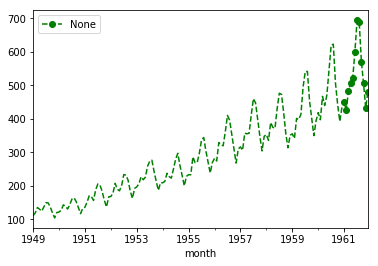

Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.


In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit2 = ExponentialSmoothing(series, seasonal_periods=12, trend='add', seasonal='mul').fit(use_boxcox=True)
fit2.fittedvalues.plot(style='--', color='green')
fit2.forecast(12).plot(style='--', marker='o', color='green', legend=True)

plt.show()
print("Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.")

C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestam

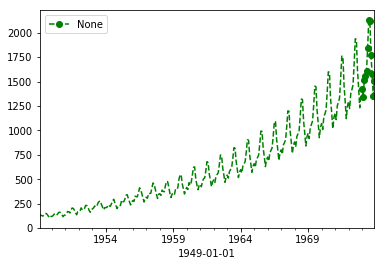

Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.


In [17]:
fit2 = ExponentialSmoothing(series288, seasonal_periods=12, trend='add', seasonal='mul').fit(use_boxcox=True)
fit2.fittedvalues.plot(style='--', color='green')
fit2.forecast(12).plot(style='--', marker='o', color='green', legend=True)

plt.show()
print("Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.")